#  Use-case: An HR firm has hired you as a Data Scientist. Your job is to create and deploy a prediction model that can predict the salary of the employee based on his/her years or experience

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('day_8/Salary_Data.csv')
data.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
# Data preprocessing not required since dataset is complete

In [ ]:
#Seperate your data as features and label
# feature --- YearsExperience
# label ----- Salary
#
# Your label is a continous numeric data, we can try regression algo to create our model

In [ ]:
# Since you are going to use SKLEARN for linear Regression
# 1. Sklearn expects your data to be complete
# 2. Sklearn expects your data to be numeric
# 3. Sklearn expects your data to be in the form of features and label
# 4. For Regression, Sklearn expects your features and label both to be 2d numpy array
# 5. For Regression, data must be free from Outliers

In [8]:
sorted(data.YearsExperience)

[1.1,
 1.3,
 1.5,
 2.0,
 2.2,
 2.9,
 3.0,
 3.2,
 3.2,
 3.7,
 3.9,
 4.0,
 4.0,
 4.1,
 4.5,
 4.9,
 5.1,
 5.3,
 5.9,
 6.0,
 6.8,
 7.1,
 7.9,
 8.2,
 8.7,
 9.0,
 9.5,
 9.6,
 10.3,
 10.5]

In [9]:
import seaborn as sns
%matplotlib inline

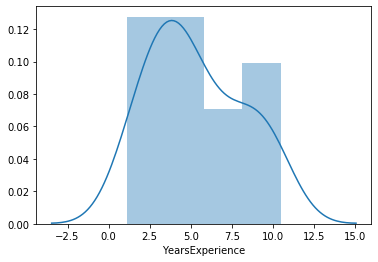

In [10]:
sns.distplot(data.YearsExperience)

In [12]:
Q1,Q3 = np.percentile(data.YearsExperience, [25,75])
Q1,Q3 


(3.2, 7.700000000000001)

In [13]:
IQR = Q3-Q1
IQR

4.500000000000001

In [14]:
lower = Q1-(1.5 * IQR)
lower

-3.5500000000000016

In [15]:
upper = Q3+(1.5 * IQR)
upper

14.450000000000003

In [21]:
def outlier(dataColumns):
    # sorted data column
    sorted(dataColumns)
    #
    Q1,Q3 =  np.percentile(dataColumns, [25,75])
    
    IQR = Q3 - Q1
    
    lowRange = Q1 - (1.5 * IQR)
    
    upperRange = Q3 + (1.5 * IQR)

    return lowRange,upperRange

In [22]:
lr,ur = outlier(data.YearsExperience)
lr,ur

(-3.5500000000000016, 14.450000000000003)

In [23]:
data[(data.YearsExperience < lr) | (data.YearsExperience > ur)]

,YearsExperience,Salary


In [16]:
data[(data.YearsExperience < lower) | (data.YearsExperience > upper)]

,YearsExperience,Salary


In [24]:
features = data.iloc[:,[0]].values
label = data.iloc[:,[1]].values

In [ ]:
# Deal with missing data -- Not required for this dataset

In [ ]:
# Deal with categorical data -- Not required for this dataset

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
for i in range(1,30):
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                     label,
                                                     test_size=0.2,
                                                     random_state = i)
    
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    trainingScore  = model.score(X_train,y_train)
    testingScore =  model.score(X_test,y_test)
    
    if testingScore > trainingScore:
        print("trainingScore: {}  testingScore: {} random_state: {} ".format(trainingScore,testingScore,i))

trainingScore: 0.9545249190394052  testingScore: 0.9695039421049821 random_state: 3 
trainingScore: 0.9528197369259258  testingScore: 0.9631182154839475 random_state: 8 
trainingScore: 0.9494673013344644  testingScore: 0.9816423482070255 random_state: 10 
trainingScore: 0.9527636176933665  testingScore: 0.9606215790278543 random_state: 14 
trainingScore: 0.9460054870434312  testingScore: 0.9835849730044817 random_state: 26 
trainingScore: 0.9527636606684406  testingScore: 0.9636425773684422 random_state: 27 


In [34]:
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                     label,
                                                     test_size=0.2,
                                                     random_state = 26)
    
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    trainingScore  = model.score(X_train,y_train)
    testingScore =  model.score(X_test,y_test)

In [35]:
trainingScore

0.9460054870434312

In [36]:
testingScore

0.9835849730044817

In [ ]:
#Approved

In [38]:
#Equation
model.intercept_

array([26594.41811015])

In [39]:
model.coef_

array([[9393.91275928]])

In [ ]:
#Equation of line is 
#Salary = 26594.41811015 + 9393.91275928 (YearsExperience)

#What will be the salary of fresher?
# Rs.26594.41

In [40]:
model.predict(np.array([[0]]))

array([[26594.41811015]])

In [43]:
# User input
yexp = float(input("Enter Years of Experience: "))
sal = model.predict(np.array([[yexp]]))
print("The salary for {} years of experience is {}".format(yexp,sal))

Enter Years of Experience: 2
The salary for 2.0 years of experience is [[45382.24362871]]


In [44]:
import  pickle

pickle.dump(model, open('SalaryHRPredict.mdl','wb'))

In [45]:
model.coef_

array([[9393.91275928]])

In [46]:
model.intercept_

array([26594.41811015])